***
***
# 计算思维：奥运会比赛数据分析
***
***

王成军 

wangchengjun@nju.edu.cn

计算传播网 http://computational-communication.com

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm

matplotlib.style.use('fivethirtyeight')

In [3]:
game = pd.read_csv('/Users/chengjun/bigdata/olympic/summer.csv')
country = pd.read_csv('/Users/chengjun/bigdata/olympic/dictionary.csv')
# https://www.kaggle.com/the-guardian/olympic-games

In [4]:
import warnings 
warnings.filterwarnings('ignore')

game['gold']=0
game['silver']=0
game['bronze']=0
game['gold'][game['Medal']=='Gold'] = 1
game['silver'][game['Medal']=='Silver'] = 1
game['bronze'][game['Medal']=='Bronze'] = 1
game['score']=0
game['score'][game['Medal']=='Gold'] = 4
game['score'][game['Medal']=='Silver'] = 2
game['score'][game['Medal']=='Bronze'] = 1

In [10]:
country[:5]

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [5]:
game[:3]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,gold,silver,bronze,score
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,1,0,0,4
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,0,1,0,2
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,0,0,1,1


In [7]:
'，'.join(game.columns)

'Year，City，Sport，Discipline，Athlete，Country，Gender，Event，Medal，gold，silver，bronze，score'

黑人从游泳项目当中消失了

# 金牌得分的垄断程度

In [5]:
import powerlaw
def plotPowerlaw(data,ax,col,xlab):
    fit = powerlaw.Fit(data,xmin=1)
    #fit = powerlaw.Fit(data)
    fit.plot_pdf(color = col, linewidth = 2)
    a,x = (fit.power_law.alpha,fit.power_law.xmin)
    fit.power_law.plot_pdf(color = col, linestyle = 'dotted', ax = ax, \
                            label = r"$\alpha = %d \:\:, x_{min} = %d$" % (a,x))
    ax.set_xlabel(xlab, fontsize = 20)
    ax.set_ylabel('$Probability$', fontsize = 20)
    plt.legend(loc = 0, frameon = False)
    
def plotCCDF(data,ax,col,xlab):
    fit = powerlaw.Fit(data,xmin=1)
    #fit = powerlaw.Fit(data)
    fit.plot_ccdf(color = col, linewidth = 2)
    a,x = (fit.power_law.alpha,fit.power_law.xmin)
    fit.power_law.plot_ccdf(color = col, linestyle = 'dotted', ax = ax, \
                            label = r"$\alpha = %d \:\:, x_{min} = %d$" % (a,x))
    ax.set_xlabel(xlab, fontsize = 16)
    ax.set_ylabel('$CCDF$', fontsize = 16)
    plt.legend(loc = 0, frameon = False)
    

In [14]:
gsb = game.groupby(['Country']).sum()[['gold', 'silver', 'bronze', 'score']]

In [15]:
gsb = gsb.sort_values(['score'], ascending = False)
gsb[:20]

,gold,silver,bronze,score
Country,,,,
USA,2235,1252,1098,12542
URS,838,627,584,5190
GBR,546,621,553,3979
ITA,476,416,404,3140
FRA,408,491,497,3111
GER,452,378,475,3039
HUN,412,316,351,2631
AUS,312,405,472,2530
SWE,349,367,328,2458


In [16]:
help(gsb.merge)

Help on method merge in module pandas.core.frame:

merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False) method of pandas.core.frame.DataFrame instance
    Merge DataFrame objects by performing a database-style join operation by
    columns or indexes.
    
    If joining columns on columns, the DataFrame indexes *will be
    ignored*. Otherwise if joining indexes on indexes or indexes on a column or
    columns, the index will be passed on.
    
    Parameters
    ----------
    right : DataFrame
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order
        * right: use only keys from right frame, similar to a SQL right outer join;
          preserve key order
        * outer: use union of keys from both frames, similar to a SQL full outer
          join; sort

In [17]:
gsb = gsb.merge(country, how = 'left', right_on = 'Code', left_index= True)
gsb[:20]

,gold,silver,bronze,score,Country,Code,Population,GDP per Capita
191,2235,1252,1098,12542,United States,USA,3.214188e+08,56115.718426
200,838,627,584,5190,NaN,URS,NaN,NaN
190,546,621,553,3979,United Kingdom,GBR,6.513823e+07,43875.969614
90,476,416,404,3140,Italy,ITA,6.080208e+07,29957.804315
66,408,491,497,3111,France,FRA,6.680838e+07,36205.568102
70,452,378,475,3039,Germany,GER,8.141314e+07,41313.313995
82,412,316,351,2631,Hungary,HUN,9.844686e+06,12363.543460
10,312,405,472,2530,Australia,AUS,2.378117e+07,56310.962993
174,349,367,328,2458,Sweden,SWE,9.798871e+06,50579.673649
200,329,271,225,2083,NaN,GDR,NaN,NaN


In [15]:
gsb.index

Index([u'USA', u'URS', u'GBR', u'ITA', u'FRA', u'GER', u'HUN', u'AUS', u'SWE',
       u'GDR',
       ...
       u'TOG', u'ERI', u'DJI', u'MKD', u'BRN', u'MRI', u'BER', u'NIG', u'BAR',
       u'GUY'],
      dtype='object', name=u'Country', length=147)

t-SNE: 0.014 sec


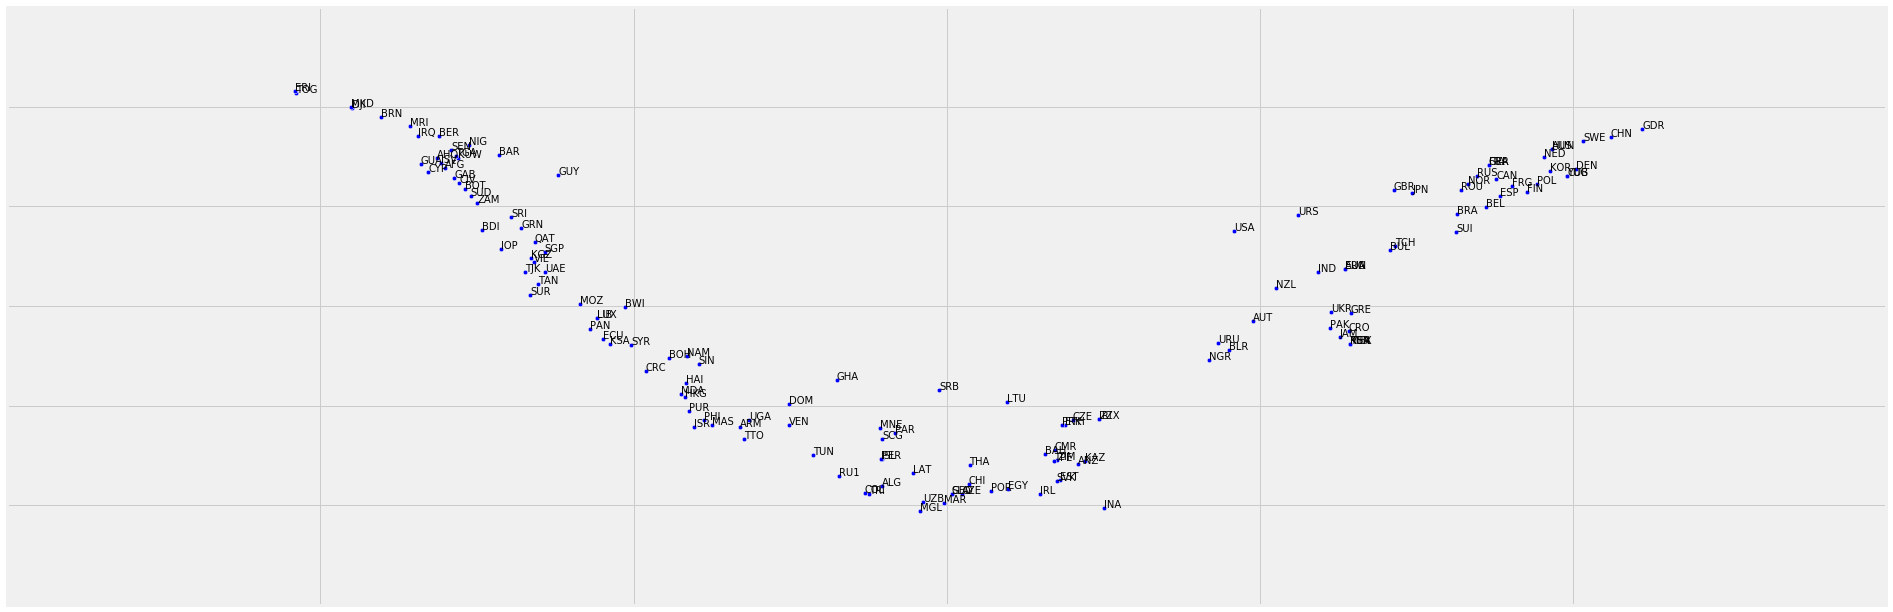

In [52]:
from time import time

from sklearn import manifold
from sklearn.utils import check_random_state

data = gsb
# Perform t-distributed stochastic neighbor embedding.
t0 = time()
# tsne = manifold.TSNE(n_components=2, init='pca', random_state=0, method = 'exact')
# trans_data = tsne.fit_transform(data).T
se = manifold.SpectralEmbedding(n_components=2, n_neighbors=10)
trans_data = se.fit_transform(data).T
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))

from matplotlib.ticker import NullFormatter
fig = plt.figure(figsize=(30, 10),facecolor='white')
ax = fig.add_subplot(1, 1, 1)
plt.scatter(trans_data[0], trans_data[1])  # c=colors
for i in range(len(gsb)):
    plt.text(trans_data[0][i], trans_data[1][i], gsb.index[i], fontsize = 10)  # c=colors
#plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.show()

In [17]:
gsb['rank']=range(1, len(gsb)+1)

In [27]:
gsb[:5]

,gold,silver,bronze,score,rank
Country,,,,,
USA,2235,1252,1098,12542,1
URS,838,627,584,5190,2
GBR,546,621,553,3979,3
ITA,476,416,404,3140,4
FRA,408,491,497,3111,5


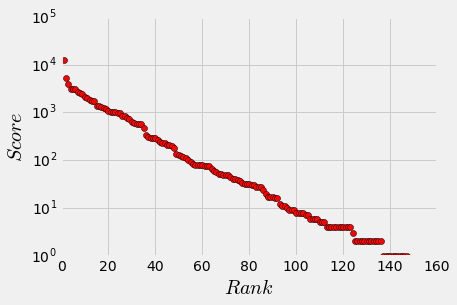

In [31]:
plt.plot(gsb['rank'], gsb.score, 'ro')
#plt.xscale('log'); 
plt.yscale('log')
plt.xlabel(r'$Rank$', fontsize = 20)
plt.ylabel(r'$Score$', fontsize = 20)
plt.show()

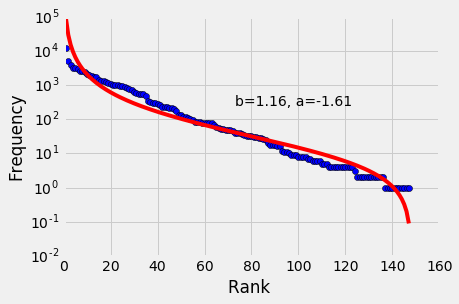

In [30]:
from flownetwork import flownetwork as fn

fn.DGBDPlot(gsb.score)

[0.13616703455127721,
 -0.25190827875999861,
 -0.0003107393859681513,
 0.9626301352057971]

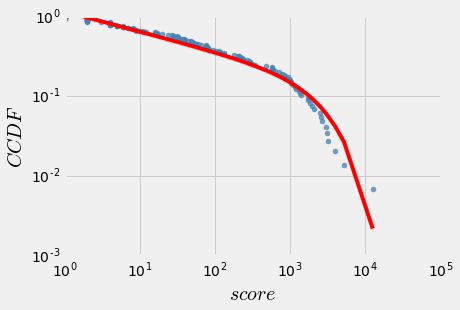

In [36]:
fn.powerLawExponentialCutOffPlot(gsb.score, '$score$', '$CCDF$')

Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


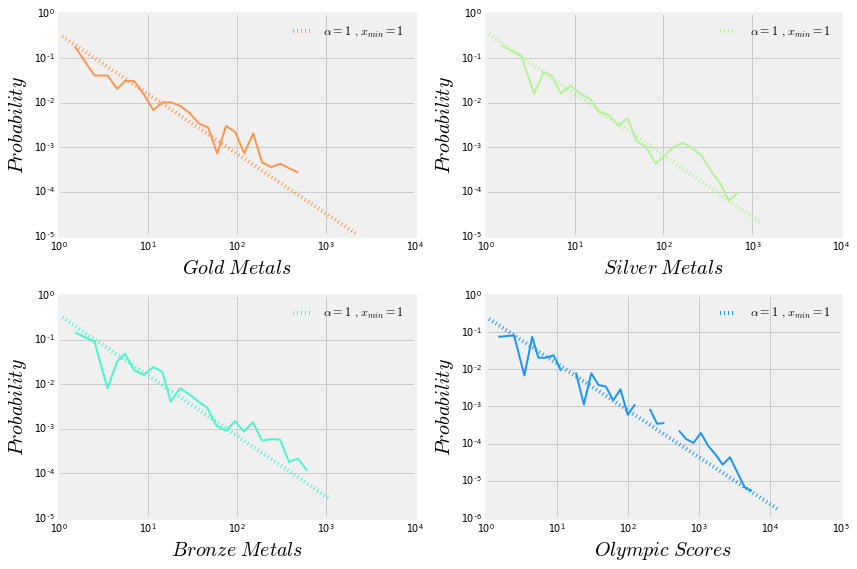

In [211]:
import matplotlib.cm as cm
cmap = cm.get_cmap('rainbow_r',6)

fig = plt.figure(figsize=(12, 8),facecolor='white')
ax = fig.add_subplot(2, 2, 1)
plotPowerlaw(gsb.gold, ax,cmap(1), '$Gold\;Metals$')
#plotCCDF(gsb.score, ax,cmap(4), '$Gold\;Metals$')
ax = fig.add_subplot(2, 2, 2)
plotPowerlaw(gsb.silver, ax,cmap(2), '$Silver\;Metals$')

ax = fig.add_subplot(2, 2, 3)
plotPowerlaw(gsb.bronze, ax,cmap(3), '$Bronze\;Metals$')

ax = fig.add_subplot(2, 2, 4)
plotPowerlaw(gsb.score, ax,cmap(4), '$Olympic\;Scores$')

plt.tight_layout()

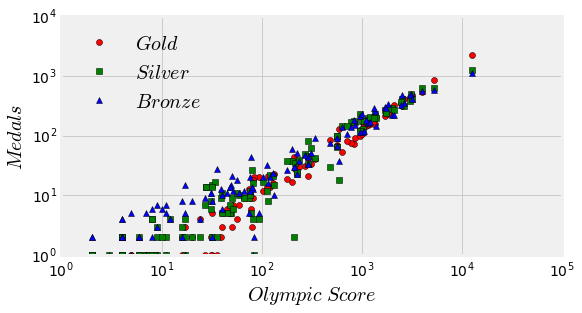

In [14]:
fig = plt.figure(figsize=(8, 4),facecolor='white')

plt.plot(gsb['score'], gsb['gold'], 'ro', label = '$Gold$')
plt.plot(gsb['score'], gsb['silver'], 'gs', label = '$Silver$')
plt.plot(gsb['score'], gsb['bronze'], 'b^', label = '$Bronze$')
plt.xscale('log'); plt.yscale('log')
plt.xlabel(r'$Olympic\;Score$', fontsize = 20)
plt.ylabel(r'$Medals$', fontsize = 20)
plt.legend(loc = 2, numpoints = 1, fontsize = 20, frameon = False)
plt.show()

In [17]:
gsb20 = gsb.sort_values('gold', ascending = False)[:20]

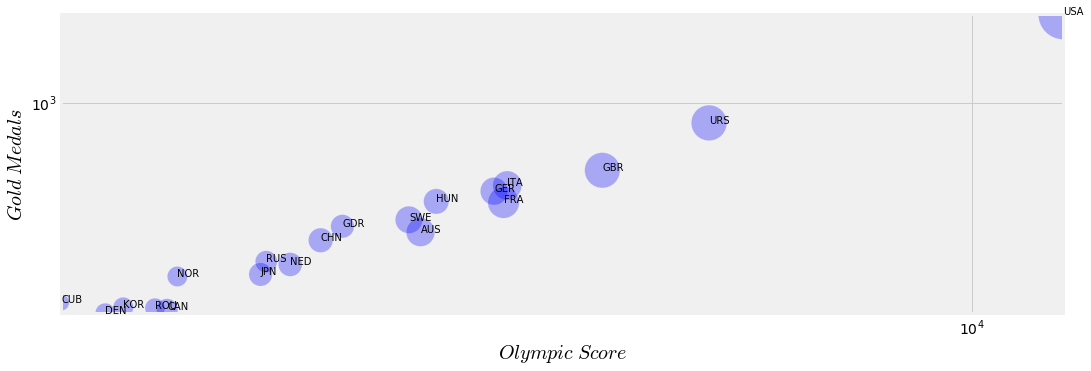

In [18]:
fig = plt.figure(figsize=(16, 5),facecolor='white')
plt.scatter(gsb20['score'], gsb20['gold'], s = gsb20['silver']*2, alpha = 0.3)

for k, i in enumerate(gsb20.index):
    plt.text(gsb20['score'][k], gsb20['gold'][k], i, fontsize = 10)
plt.xscale('log'); plt.yscale('log')
plt.xlim((0, np.max(gsb20.score)))
plt.ylim((0, np.max(gsb20.gold)))

plt.ylabel(r'$Gold\;Medals$', fontsize = 20)
plt.xlabel(r'$Olympic\;Score$', fontsize = 20)

plt.show()

In [24]:
def gini_coefficient(v):
    bins = np.linspace(0., 100., 11)
    total = float(np.sum(v))
    yvals = []
    for b in bins:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)
    # perfect equality area
    pe_area = np.trapz(bins, x=bins)
    # lorenz area
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area - lorenz_area) / float(pe_area)
    return bins, yvals, gini_val

In [19]:
help(np.trapz)

Help on function trapz in module numpy.lib.function_base:

trapz(y, x=None, dx=1.0, axis=-1)
    Integrate along the given axis using the composite trapezoidal rule.
    
    Integrate `y` (`x`) along given axis.
    
    Parameters
    ----------
    y : array_like
        Input array to integrate.
    x : array_like, optional
        The sample points corresponding to the `y` values. If `x` is None,
        the sample points are assumed to be evenly spaced `dx` apart. The
        default is None.
    dx : scalar, optional
        The spacing between sample points when `x` is None. The default is 1.
    axis : int, optional
        The axis along which to integrate.
    
    Returns
    -------
    trapz : float
        Definite integral as approximated by trapezoidal rule.
    
    See Also
    --------
    sum, cumsum
    
    Notes
    -----
    Image [2]_ illustrates trapezoidal rule -- y-axis locations of points
    will be taken from `y` array, by default x-axis distances betwee

In [18]:
np.linspace(0, 100, 11)

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

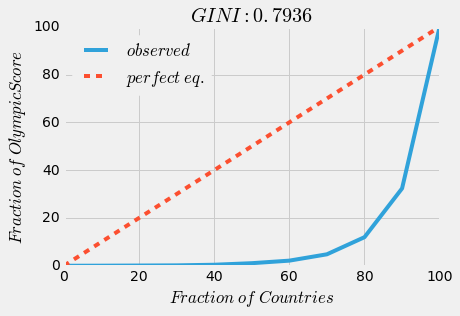

In [23]:
score_all = game.groupby(['Country']).sum()['score']
bins, result, gini_val = gini_coefficient(score_all)

plt.plot(bins, result, label="$observed$")
plt.plot(bins, bins, '--', label="$perfect\; eq.$")
plt.xlabel("$Fraction\; of\; Countries$")
plt.ylabel("$Fraction\; of \;Olympic Score$")
plt.title("$GINI: %.4f$" %(gini_val))
plt.legend(loc=0)
plt.show()

In [11]:
game['award']=1

In [12]:
country[:3]

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232


In [22]:
disciplines = game.Discipline.unique()

In [43]:
gg = game.groupby(['Discipline', 'Country']).sum()

In [123]:
ggds = gg['score']['Swimming']
ggds_max = ggds.sort_values(ascending = False).iloc[0]
gg_sum = np.sum(ggds)
gg_max  = ggds.sort_values(ascending = False)
gg_max_value, gg_max_index = gg_max.iloc[0], gg_max.index[0]
gg_max_ratio = np.float(gg_max_value)/gg_sum
print gg_max_value, gg_max_ratio, gg_max_index

2627 0.423231835025 USA


In [44]:
np.array(gg['award']['Croquet'])

array([8])

In [45]:
gini_coefficient(np.array(gg['award']['Cricket']))[2]

-0.80000000000000004

In [128]:
for i in disciplines:
    if len(gg['award'][i]) > 10:
        print i, gini_coefficient(gg['award'][i])[2]

Swimming 0.750646879756
Athletics 0.744624690679
Cycling Road 0.492698412698
Cycling Track 0.621390374332
Fencing 0.689336639802
Artistic G. 0.539752734189
Shooting 0.661304347826
Tennis 0.588851351351
Weightlifting 0.530118443316
Wrestling Gre-R 0.542987249545
Water polo 0.415909090909
Archery 0.593920972644
Jumping 0.411009174312
Football 0.323513694055
Rowing 0.619422572178
Sailing 0.632371505861
Diving 0.619897959184
Boxing 0.587695749441
Wrestling Free. 0.600846023689
Hockey 0.498734177215
Dressage 0.417602996255
Eventing 0.47250755287
Modern Pentath. 0.53275862069
Basketball 0.49476284585
Canoe / Kayak F 0.528179824561
Handball 0.307913669065
Judo 0.573319755601
Volleyball 0.364346895075
Canoe / Kayak S 0.368888888889
Rhythmic G. 0.483870967742
Table Tennis 0.623611111111
Mountain Bike 0.236666666667
Taekwondo 0.366964285714
Triathlon 0.2
Canoe Sprint 0.393939393939
Gymnastics Artistic 0.456060606061
Wrestling Freestyle 0.26338028169


In [48]:
for i in disciplines:
    if len(gg['score'][i]) > 10:
        print i, gini_coefficient(gg['score'][i])[2]

Swimming 0.779764781698
Athletics 0.758814536046
Cycling Road 0.548517520216
Cycling Track 0.663709215799
Fencing 0.729624770401
Artistic G. 0.582544085595
Shooting 0.69337797619
Tennis 0.661027190332
Weightlifting 0.591250903832
Wrestling Gre-R 0.602675059009
Water polo 0.506969990319
Archery 0.675243902439
Jumping 0.464
Football 0.412260097393
Rowing 0.656681657565
Sailing 0.684247331616
Diving 0.666118421053
Boxing 0.648324324324
Wrestling Free. 0.668672046955
Hockey 0.552040512362
Dressage 0.51077170418
Eventing 0.516174582798
Modern Pentath. 0.582019704433
Basketball 0.628854254423
Canoe / Kayak F 0.557377819549
Handball 0.439381898455
Judo 0.632790224033
Volleyball 0.510224667584
Canoe / Kayak S 0.497619047619
Rhythmic G. 0.575115207373
Table Tennis 0.725609756098
Mountain Bike 0.39
Taekwondo 0.499166666667
Triathlon 0.364285714286
Canoe Sprint 0.448701298701
Gymnastics Artistic 0.538311688312
Wrestling Freestyle 0.474647887324


# 金牌得分与人口和GDP的关系

In [54]:
score_all['AFG']

2

In [60]:
len(score_all.index)

147

In [24]:
len(country)

201

In [25]:
medal_score = []
for i in country.Code:
    if i in score_all.index:
        medal_score.append(score_all[i])
    else:
        medal_score.append(0)

In [26]:
country['medal_score'] = medal_score

In [27]:
country[:3]

,Country,Code,Population,GDP per Capita,medal_score
0,Afghanistan,AFG,32526562.0,594.323081,2
1,Albania,ALB,2889167.0,3945.217582,0
2,Algeria,ALG,39666519.0,4206.031232,32


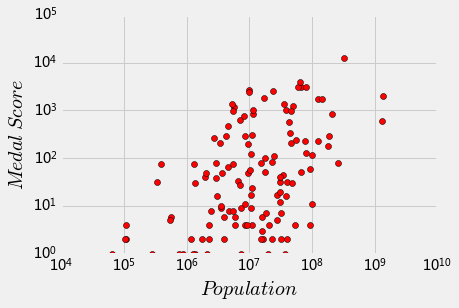

In [70]:
matplotlib.style.use('fivethirtyeight')

plt.plot(country['Population'], country['medal_score'], 'ro')
plt.xscale('log'); plt.yscale('log')
plt.xlabel(r'$Population$', fontsize = 20)
plt.ylabel(r'$Medal\; Score$', fontsize = 20)
plt.show()

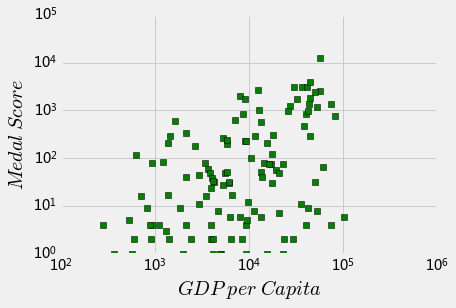

In [72]:
plt.plot(country['GDP per Capita'], country['medal_score'], 'gs')
plt.xscale('log'); plt.yscale('log')
plt.xlabel(r'$GDP \;per\; Capita$', fontsize = 20)
plt.ylabel(r'$Medal\; Score$', fontsize = 20)
plt.show()

In [29]:
import statsmodels.formula.api as smf


data = pd.DataFrame({'y':country['medal_score'], \
                     'xg':country['GDP per Capita'],\
                     'xp': country['Population']
                     })

data['y_log'] = np.log(data.y + 1)
data['xg_log'] = np.log(data.xg)
data['xp_log'] = np.log(data.xp)

lm = smf.ols(formula='y ~ xg + xp', data=data).fit()
constant, beta1, beta2 = lm.params
r2=lm.rsquared
print constant, beta1, beta2, r2

-98.151090209 0.0269927515178 2.06731854693e-06 0.237309791323


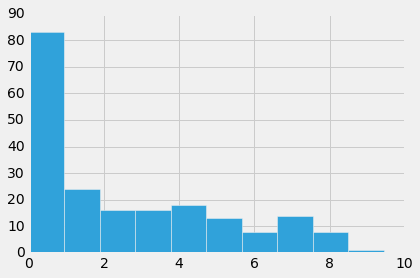

In [35]:
plt.hist(data.y_log)
plt.show()

In [38]:
data.describe()

,xg,xp,y,y_log,xg_log,xp_log
count,176.000000,1.960000e+02,201.000000,201.000000,176.000000,196.000000
mean,12882.556131,3.722825e+07,298.621891,2.448240,8.564584,15.496793
std,17747.141203,1.399655e+08,1075.062857,2.607275,1.443510,2.261906
min,277.068309,1.022200e+04,0.000000,0.000000,5.624264,9.232298
25%,1781.096847,1.638278e+06,0.000000,0.000000,7.484306,14.304578
50%,5233.583395,7.450124e+06,4.000000,1.609438,8.562851,15.823553
75%,15494.683646,2.557454e+07,76.000000,4.343805,9.648250,17.056713
max,101449.968168,1.371220e+09,12542.000000,9.436918,11.527321,21.038967


In [56]:
lm2 = smf.ols(formula='y_log ~ xg_log + xp_log + xg_log * xp_log',\
              data=data).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_log   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     97.99
Date:                Wed, 17 May 2017   Prob (F-statistic):           5.02e-37
Time:                        22:03:30   Log-Likelihood:                -332.80
No. Observations:                 176   AIC:                             673.6
Df Residuals:                     172   BIC:                             686.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         2.0040      7.773      0.258      0.797       -13.338    17.346
xg_log           -1.2513      0.873     -1.434      0.153        -2.974     0.471
xp_log           -0.5376      0.479     -1.122      0.263        -1.483     0.408
xg_log:xp_log     0.1473      0.054      2.729      0.007         0.041     0.254
==============================================================================
Omnibus:                        0.682   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.711   Jarque-Bera (JB):                0.801
Skew:                          -0.081   Prob(JB):                        0.670
Kurtosis:                       2.712   Cond. No.                     8.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
lm = smf.ols(formula='y_log ~ xg_log + xp_log', data=data).fit()
constant, beta1, beta2 = lm.params
r2=lm.rsquared
print constant, beta1, beta2, r2

-18.9124276636 1.11805464157 0.759578169765 0.61488776675


In [60]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_log   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     138.1
Date:                Wed, 17 May 2017   Prob (F-statistic):           1.42e-36
Time:                        22:03:52   Log-Likelihood:                -336.53
No. Observations:                 176   AIC:                             679.1
Df Residuals:                     173   BIC:                             688.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -18.9124      1.311    -14.428      0.000       -21.500   -16.325
xg_log         1.1181      0.087     12.779      0.000         0.945     1.291
xp_log         0.7596      0.061     12.432      0.000         0.639     0.880
==============================================================================
Omnibus:                        3.667   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.160   Jarque-Bera (JB):                3.019
Skew:                          -0.212   Prob(JB):                        0.221
Kurtosis:                       2.519   Cond. No.                         190.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

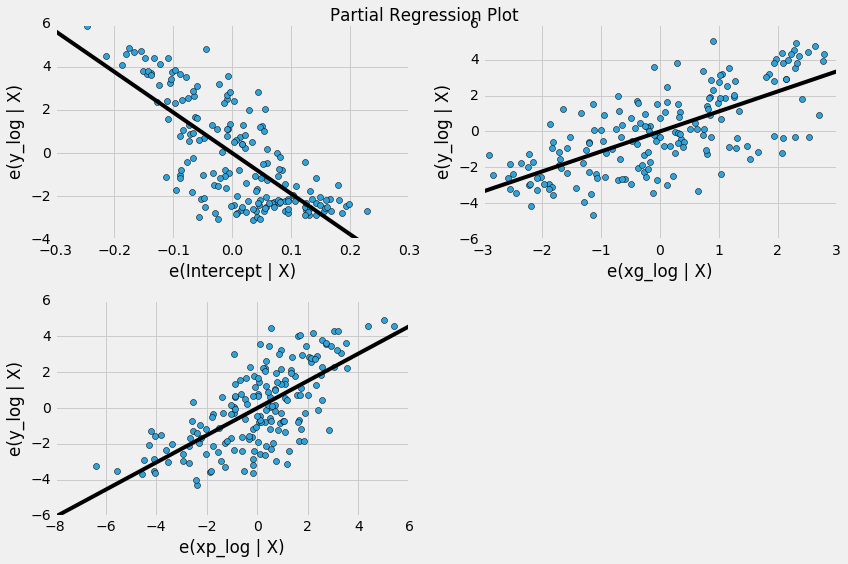

In [61]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(lm, fig = fig)
plt.show()

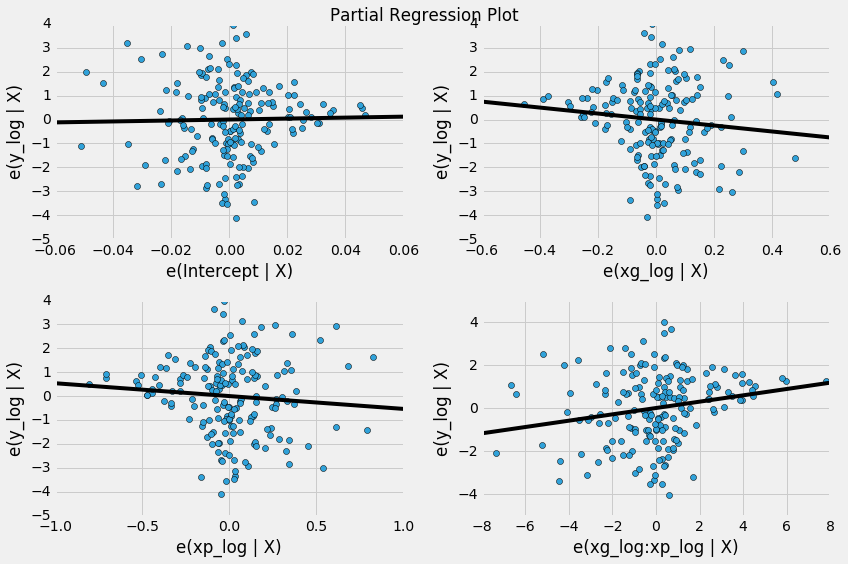

In [57]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(lm2, fig = fig)
plt.show()

# 垄断程度随时间变化

In [74]:
game[:3]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,award,score
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,1,4
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,1,2
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,1,1


In [20]:
years = game.Year.unique()
years

array([1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
       1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
       1996, 2000, 2004, 2008, 2012])

In [21]:
ggy = game.groupby(['Year', 'Country']).sum()['score']

In [22]:
ggy[1896]

Country
AUS      8
AUT     12
DEN     11
FRA     30
GBR     16
GER    116
GRE    102
HUN     13
SUI      8
USA     60
ZZX     14
Name: score, dtype: int64

In [25]:
gini = [gini_coefficient(ggy[i])[2] for i in years]

In [28]:
years

array([1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
       1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
       1996, 2000, 2004, 2008, 2012])

In [30]:
np.array(gini)

array([0.46512821, 0.67843296, 0.81324392, 0.69133234, 0.56039272,
       0.61761978, 0.63218225, 0.56204156, 0.6509589 , 0.65595353,
       0.64754184, 0.68561809, 0.66457226, 0.70452996, 0.68741977,
       0.66071876, 0.71833821, 0.70165508, 0.72029795, 0.72544326,
       0.72905576, 0.72022901, 0.69916551, 0.69942197, 0.68351672,
       0.72438455, 0.71583296])

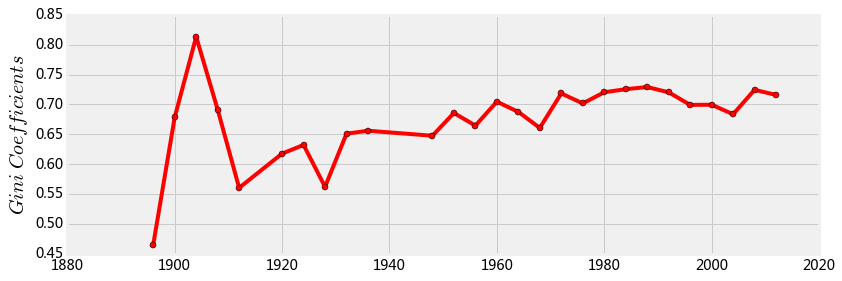

In [26]:
fig = plt.figure(figsize=(12, 4),facecolor='white')

plt.plot(years, gini, 'r-o')
plt.ylabel(r'$Gini\; Coefficients$', fontsize = 20)
plt.show()

In [88]:
gini

[0.46512820512820519,
 0.67843295638126011,
 0.81324392288348701,
 0.69133234274393263,
 0.56039272030651333,
 0.61761978361669245,
 0.63218225419664265,
 0.56204156479217604,
 0.65095890410958912,
 0.65595353339787021,
 0.6475418410041841,
 0.68561808561808557,
 0.66457225712904788,
 0.70452995616171454,
 0.68741976893453138,
 0.66071876305892185,
 0.71833821376281115,
 0.70165508109897379,
 0.7202979515828678,
 0.72544326241134749,
 0.72905575791538246,
 0.72022900763358777,
 0.69916550764951313,
 0.699421965317919,
 0.68351672060409929,
 0.72438455008488967,
 0.71583296114336759]

In [89]:
years

array([1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
       1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
       1996, 2000, 2004, 2008, 2012])

# 单项垄断者

In [91]:
game[:3]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,award,score
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,1,4
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,1,2
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,1,1


In [131]:
gg = game.groupby(['Discipline', 'Country']).sum()
for i in disciplines:
    ggds = gg['score'][i]
    ggds_max = ggds.sort_values(ascending = False).iloc[0]
    gg_sum = np.sum(ggds)
    gg_max  = ggds.sort_values(ascending = False)
    gg_max_value, gg_max_index = gg_max.iloc[0], gg_max.index[0]
    gg_max_ratio = np.float(gg_max_value)/gg_sum
    if gg_max_ratio >= .5:
        print i, gg_max_ratio, gg_max_index

Basque Pelota 0.666666666667 ESP
Cricket 0.666666666667 GBR
Croquet 1.0 FRA
Golf 0.914634146341 USA
Lacrosse 0.64367816092 CAN
Roque 1.0 USA
Jeu de Paume 0.571428571429 USA
Rackets 1.0 GBR
Water Motorspor 0.8 GBR
Vaulting 0.694444444444 BEL
Ice Hockey 0.516129032258 CAN
Table Tennis 0.655487804878 CHN
Softball 0.5 USA
Synchronized Swimming 0.571428571429 RUS
Gymnastics Rhythmic 0.612244897959 RUS


In [134]:
gg = game[game['Year'] > 1990].groupby(['Discipline', 'Country']).sum()
disciplines_1990 = game[game['Year'] > 1990]['Discipline'].unique()
for i in disciplines_1990:
    ggds = gg['score'][i]
    ggds_max = ggds.sort_values(ascending = False).iloc[0]
    gg_sum = np.sum(ggds)
    gg_max  = ggds.sort_values(ascending = False)
    gg_max_value, gg_max_index = gg_max.iloc[0], gg_max.index[0]
    gg_max_ratio = np.float(gg_max_value)/gg_sum
    if gg_max_ratio >= .5:
        print i, gg_max_ratio, gg_max_index

Diving 0.533163265306 CHN
Basketball 0.501492537313 USA
Dressage 0.515306122449 GER
Table Tennis 0.685314685315 CHN
Softball 0.5 USA
Synchronized Swimming 0.571428571429 RUS
Gymnastics Rhythmic 0.612244897959 RUS


In [154]:
game_dat = game[game['Year'] < 1990][game['Year'] < 1970]
gg = game_dat.groupby(['Discipline', 'Country']).sum()
disciplines_1990 = game_dat['Discipline'].unique()
for i in disciplines_1990:
    ggds = gg['score'][i]
    ggds_max = ggds.sort_values(ascending = False).iloc[0]
    gg_sum = np.sum(ggds)
    gg_max  = ggds.sort_values(ascending = False)
    gg_max_value, gg_max_index = gg_max.iloc[0], gg_max.index[0]
    gg_max_ratio = np.float(gg_max_value)/gg_sum
    if gg_max_ratio >= .5:
        print i, gg_max_ratio, gg_max_index

Basque Pelota 0.666666666667 ESP
Cricket 0.666666666667 GBR
Croquet 1.0 FRA
Golf 0.914634146341 USA
Diving 0.671052631579 USA
Lacrosse 0.64367816092 CAN
Roque 1.0 USA
Jeu de Paume 0.571428571429 USA
Rackets 1.0 GBR
Water Motorspor 0.8 GBR
Vaulting 0.694444444444 BEL
Ice Hockey 0.516129032258 CAN
Basketball 0.587275693312 USA
Handball 0.590604026846 GER
Volleyball 0.5 URS


/Users/chengjun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [151]:
game_dat = game[game['Year'] < 1970][game['Year'] > 1950]
gg = game_dat.groupby(['Discipline', 'Country']).sum()
disciplines_1990 = game_dat['Discipline'].unique()
for i in disciplines_1990:
    ggds = gg['score'][i]
    ggds_max = ggds.sort_values(ascending = False).iloc[0]
    gg_sum = np.sum(ggds)
    gg_max  = ggds.sort_values(ascending = False)
    gg_max_value, gg_max_index = gg_max.iloc[0], gg_max.index[0]
    gg_max_ratio = np.float(gg_max_value)/gg_sum
    if gg_max_ratio >= .5:
        print i, gg_max_ratio, gg_max_index

Diving 0.657142857143 USA
Swimming 0.5 USA
Basketball 0.574074074074 USA
Volleyball 0.5 URS


/Users/chengjun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [155]:
game_dat = game[game['Year'] < 1950][game['Year'] > 1930]
gg = game_dat.groupby(['Discipline', 'Country']).sum()
disciplines_1990 = game_dat['Discipline'].unique()
for i in disciplines_1990:
    ggds = gg['score'][i]
    ggds_max = ggds.sort_values(ascending = False).iloc[0]
    gg_sum = np.sum(ggds)
    gg_max  = ggds.sort_values(ascending = False)
    gg_max_value, gg_max_index = gg_max.iloc[0], gg_max.index[0]
    gg_max_ratio = np.float(gg_max_value)/gg_sum
    if gg_max_ratio >= .5:
        print i, gg_max_ratio, gg_max_index

Diving 0.952380952381 USA
Water polo 0.512315270936 HUN
Hockey 0.613496932515 IND
Modern Pentath. 0.52380952381 SWE
Basketball 0.618784530387 USA
Handball 0.590604026846 GER
Polo 0.571428571429 ARG


/Users/chengjun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [153]:
game_dat = game[game['Year'] < 1930][game['Year'] > 1910]
gg = game_dat.groupby(['Discipline', 'Country']).sum()
disciplines_1990 = game_dat['Discipline'].unique()
for i in disciplines_1990:
    ggds = gg['score'][i]
    ggds_max = ggds.sort_values(ascending = False).iloc[0]
    gg_sum = np.sum(ggds)
    gg_max  = ggds.sort_values(ascending = False)
    gg_max_value, gg_max_index = gg_max.iloc[0], gg_max.index[0]
    gg_max_ratio = np.float(gg_max_value)/gg_sum
    if gg_max_ratio >= .5:
        print i, gg_max_ratio, gg_max_index

Diving 0.555555555556 USA
Dressage 0.521739130435 SWE
Modern Pentath. 0.964285714286 SWE
Sailing 0.5168 NOR
Archery 0.655172413793 BEL
Vaulting 0.694444444444 BEL
Ice Hockey 0.516129032258 CAN
Rugby 0.615384615385 USA


/Users/chengjun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [42]:
from echarts import Echart, Legend, Bar, Axis
from IPython.display import HTML

chart = Echart('GDP', 'This is a fake chart')
chart.use(Bar('China', [2, 3, 4, 5]))
chart.use(Legend(['GDP']))
chart.use(Axis('category', 'bottom', data=['Nov', 'Dec', 'Jan', 'Feb']))


In [63]:
chart.plot()

https://data-journalism.github.io/olympic/index.html

In [40]:
from IPython.display import display_html, HTML
HTML('<iframe src=https://data-journalism.github.io/olympic/index.html width=1000 height=1500></iframe>')